# Frequency Conversion-Indicators-Simulation[S]

$$
\hat{H}=\hbar\left[g(\hat{a}^\dagger\hat{b}\hat{c}^\dagger+\hat{a}\hat{b}^\dagger\hat{c})+E_a(\hat{a}+\hat{a}^\dagger)+E_b(\hat{b}+\hat{b}^\dagger)\right]
$$
where the decay rate is $\kappa_a,\kappa_b,\kappa_c$

$$
\frac{d\langle A_i\rangle}{dt}=\langle\frac{i}{\hbar}[H,A_i]\rangle+\Sigma_n\langle\frac{\kappa_{n}}{2}[2O_n^{\dagger}A_iO_n- O_n^{\dagger}O_nA_i-A_iO_n^{\dagger}O_n]\rangle
$$

Ignoring the coupling for mode A, we get
$$
\frac{d\langle\hat{a}\rangle}{dt}=-iE_a-\frac{\kappa_a}{2}\langle\hat{a}\rangle
$$

Thus $\langle\hat{a}\rangle=-\frac{2iE_a}{\kappa_a}$

Apply the approximation, we get
$$
\hat{H}_{approx}=\hat{H}=\hbar\left[G^*\hat{b}\hat{c}^\dagger+G\hat{b}^\dagger\hat{c}+E_b(\hat{b}+\hat{b}^\dagger)\right]
$$
where $G=-\frac{2igE_a}{\kappa_a}$

## Initial Environment

In [2]:
#import all the things we need
%matplotlib inline
from qutip import*

from scipy import *

import QCLSolver.data as Data
import QCLSolver.solver as Solver

import numpy as np

import matplotlib.pyplot as plt

import time

In [3]:
#helper function
def BuildOperator_Exact(Ea:float,Eb:float,g:float):
    Na=40; Nc=4;Nb=6
    psi0=tensor(basis(Na,psi0_l[0]),basis(Nb,psi0_l[1]),basis(Nc,psi0_l[2]))
    a=tensor(destroy(Na),qeye(Nb),qeye(Nc))
    b=tensor(qeye(Na),destroy(Nb),qeye(Nc))
    c=tensor(qeye(Na),qeye(Nb),destroy(Nc))
    H=g*(a.dag()*b*c.dag()+a*b.dag()*c)+Ea*(a.dag()+a)+Eb*(b.dag()+b)
    c_ops=[]
    c_ops.append(np.sqrt(kappa_a)*a)
    c_ops.append(np.sqrt(kappa_b)*b)
    c_ops.append(np.sqrt(kappa_c)*c)
    operator={'Hamilton':H,'Collapse':c_ops,'Initial_state':psi0,'track':[b,c,a]}
    return operator

## Single Qutip Simulation For S

In [5]:
##parameters
kappa_a=2
kappa_b=2
kappa_c=2
psi0_l=[0,0,0]
Ea=4;Eb=0.1; g=1

In [6]:
tlist=np.linspace(0,20,2000)

### QuTip

In [7]:
op=BuildOperator_Exact(Ea,Eb,g)

In [8]:
ts=time.time()
opts=Options()
opts.atol=1e-12
opts.rtol=1e-10
output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'],options=opts)
te=time.time()
print(te-ts)

2299.8203814029694


### QCLS

In [9]:
data_approx=Data.Data([['AbC',g],['aBc',g],['A',Ea],['a',Ea],['B',Eb],['b',Eb]],\
               [['a',kappa_a],['b',kappa_b],['c',kappa_c]],['b','c','a'], 1)

In [10]:
sol_qcls_ap=Solver.Solve(data_approx,psi0_l,(0,tlist[-1]),t_eval=tlist,rtol=1e-10,atol=1e-12)

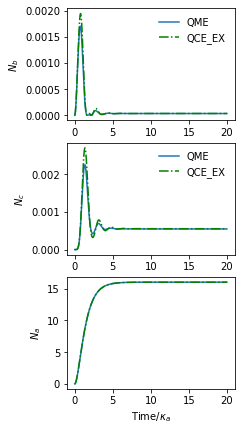

In [11]:
fig, axes = plt.subplots(3,1,figsize=(3,7))

axes[0].plot(tlist, np.real(output.expect[0]*np.conj(output.expect[0])),label="QME")
axes[1].plot(tlist, np.real(output.expect[1]*np.conj(output.expect[1])),label="QME")
axes[2].plot(tlist, np.real(output.expect[2]*np.conj(output.expect[2])),label="QME")

axes[0].plot(tlist, np.real(sol_qcls_ap.y[0]*np.conj(sol_qcls_ap.y[0])),linestyle='-.',color='green',label="QCE_EX")
axes[1].plot(tlist, np.real(sol_qcls_ap.y[1]*np.conj(sol_qcls_ap.y[1])),linestyle='-.',color='green',label="QCE_EX")
axes[2].plot(tlist, np.real(sol_qcls_ap.y[2]*np.conj(sol_qcls_ap.y[2])),linestyle='-.',color='green',label="QCE_EX")

axes[0].legend(loc=0,ncol=1,frameon=False)
axes[1].legend(loc=0,ncol=1,frameon=False)

axes[0].set_xlabel('Time/'+r'$\kappa_a$')
axes[0].set_ylabel(r'$N_b$')

axes[1].set_xlabel('Time/'+r'$\kappa_a$')
axes[1].set_ylabel(r'$N_c$')

axes[2].set_xlabel('Time/'+r'$\kappa_a$')
axes[2].set_ylabel(r'$N_a$')

fig.savefig('imgs/dynamic_behaviour_Ea_'+str(Ea)+'_g_'+str(g)+'.svg',dpi=600,format='svg')

In [12]:
print('Error a='+str(np.abs((output.expect[2][-1]-sol_qcls_ap.y[2][-1])/sol_qcls_ap.y[2][-1])))
print('Error b='+str(np.abs((output.expect[0][-1]-sol_qcls_ap.y[0][-1])/sol_qcls_ap.y[0][-1])))
print('Error c='+str(np.abs((output.expect[1][-1]-sol_qcls_ap.y[1][-1])/sol_qcls_ap.y[1][-1])))

Error a=1.2374985097760113e-05
Error b=0.006407918598775892
Error c=0.006438824657860685
